In [34]:
## Assignment 2 : Building the Car of the Future Using Linear Regression analysis
## ALY 6020 FALL B
## Sayali Shende

In [35]:
# Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [36]:
# Data Prep:

# Load the dataset

DF = pd.read_csv('Cars_data.csv')

In [37]:
# First top 5 data rows

DF.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [38]:
# Data information

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [39]:
# Double checking for nulls

DF.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

In [40]:
# Checking Horsepower varaible to inspect as data type shown as object

Count_QM = (DF['Horsepower'] == '?').sum()

# Calculate the percentage of "?"
percentage_QM = (Count_QM / len(DF)) * 100
print(f"Percentage of ? in 'Horsepower' is: {percentage_QM:.2f}%")


Percentage of ? in 'Horsepower' is: 1.51%


In [41]:
# Part A: Data Cleaning

# drooping the rows

# Replace '?' with NaN and then drop rows with NaN values
DF.replace('?', pd.NA, inplace=True)
DF.dropna(inplace=True)

# Reset index 
DF.reset_index(drop=True, inplace=True)

# Display the modified DataFrame
print(DF)

      MPG  Cylinders  Displacement Horsepower  Weight  Acceleration   
0    18.0          8         307.0        130    3504          12.0  \
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
387  27.0          4         140.0         86    2790          15.6   
388  44.0          4          97.0         52    2130          24.6   
389  32.0          4         135.0         84    2295          11.6   
390  28.0          4         120.0         79    2625          18.6   
391  31.0          4         119.0         82    2720          19.4   

     Model Year  US Made  
0            70        1  
1            70        1  
2            70        1  
3            70        1  
4           

In [42]:
# Checking Horsepower varaible to inspect if the ? are removed
Count_QM_2 = (DF['Horsepower'] == '?').sum()

# Calculate the percentage of "?"
percentage_QM_2 = (Count_QM_2 / len(DF)) * 100
print(f"Percentage of ? in 'Horsepower' is: {percentage_QM_2:.2f}%")

Percentage of ? in 'Horsepower' is: 0.00%


In [43]:
# Rechecking the data type of Horepower
DF.info()

# Converting the Horsepower into numeric data type
DF['Horsepower'] = pd.to_numeric(DF['Horsepower'], errors='coerce')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    object 
 4   Weight        392 non-null    int64  
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   US Made       392 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 24.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    int64  
 4   Weight        392 non-null    int64 

In [44]:
# Data set summary to understand the variables

summary_stats = DF.describe().round(2)
print(summary_stats)

          MPG  Cylinders  Displacement  Horsepower   Weight  Acceleration   
count  392.00     392.00        392.00      392.00   392.00        392.00  \
mean    23.45       5.47        194.41      104.47  2977.58         15.54   
std      7.81       1.71        104.64       38.49   849.40          2.76   
min      9.00       3.00         68.00       46.00  1613.00          8.00   
25%     17.00       4.00        105.00       75.00  2225.25         13.78   
50%     22.75       4.00        151.00       93.50  2803.50         15.50   
75%     29.00       8.00        275.75      126.00  3614.75         17.02   
max     46.60       8.00        455.00      230.00  5140.00         24.80   

       Model Year  US Made  
count      392.00   392.00  
mean        75.98     0.62  
std          3.68     0.48  
min         70.00     0.00  
25%         73.00     0.00  
50%         76.00     1.00  
75%         79.00     1.00  
max         82.00     1.00  


In [45]:
# Data Exploration

# List of numerical columns for predictors
num_cols = ['Cylinders', 'Displacement', 'Weight','Horsepower', 'Acceleration', 'Model Year', 'US Made']

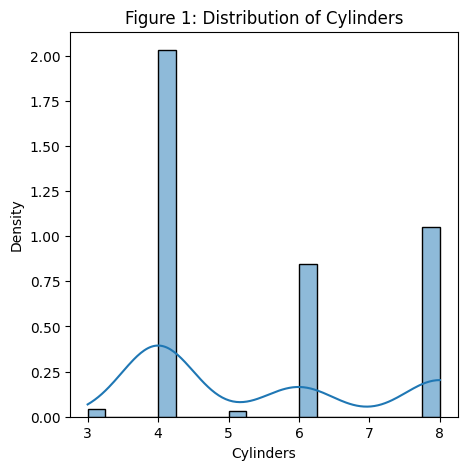

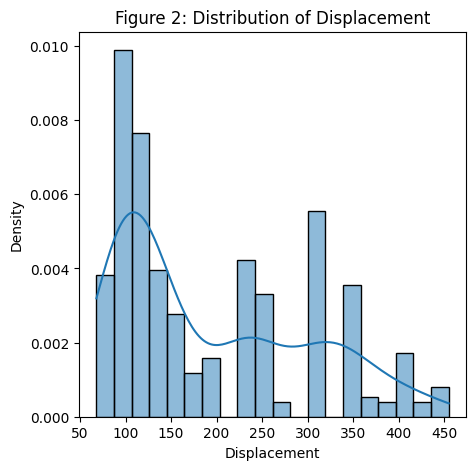

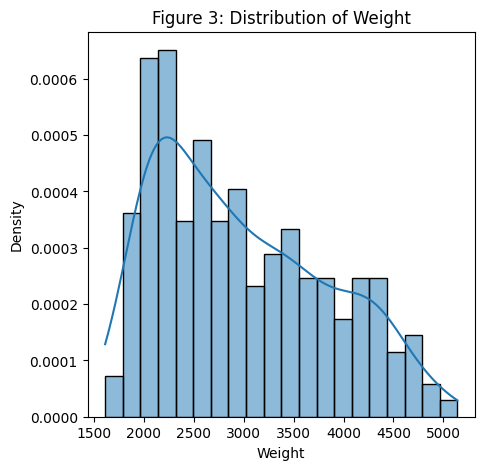

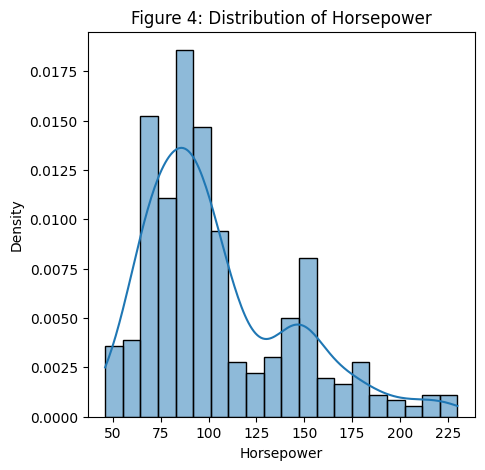

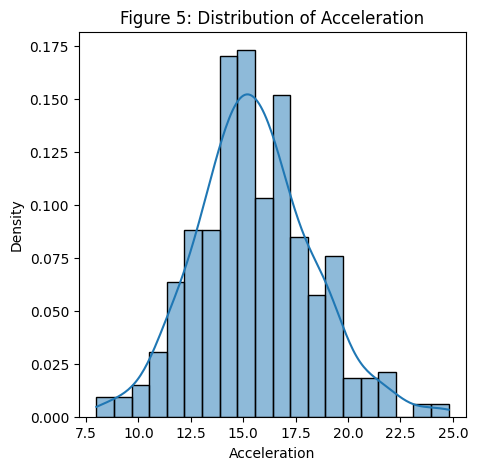

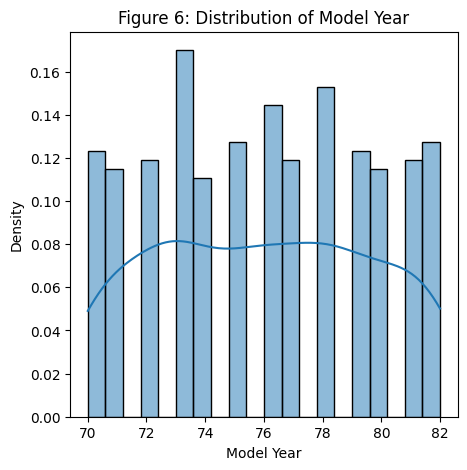

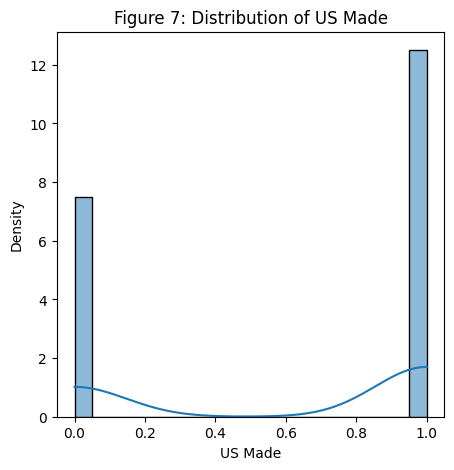

In [46]:
# Assuming num_cols is a list of numerical column names

for i, col in enumerate(num_cols, 1):
    plt.figure(figsize=(5, 5))
    sns.histplot(DF[col], kde=True, stat='density', bins=20)  # You can adjust the number of bins as needed
    plt.title(f'Figure {i}: Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

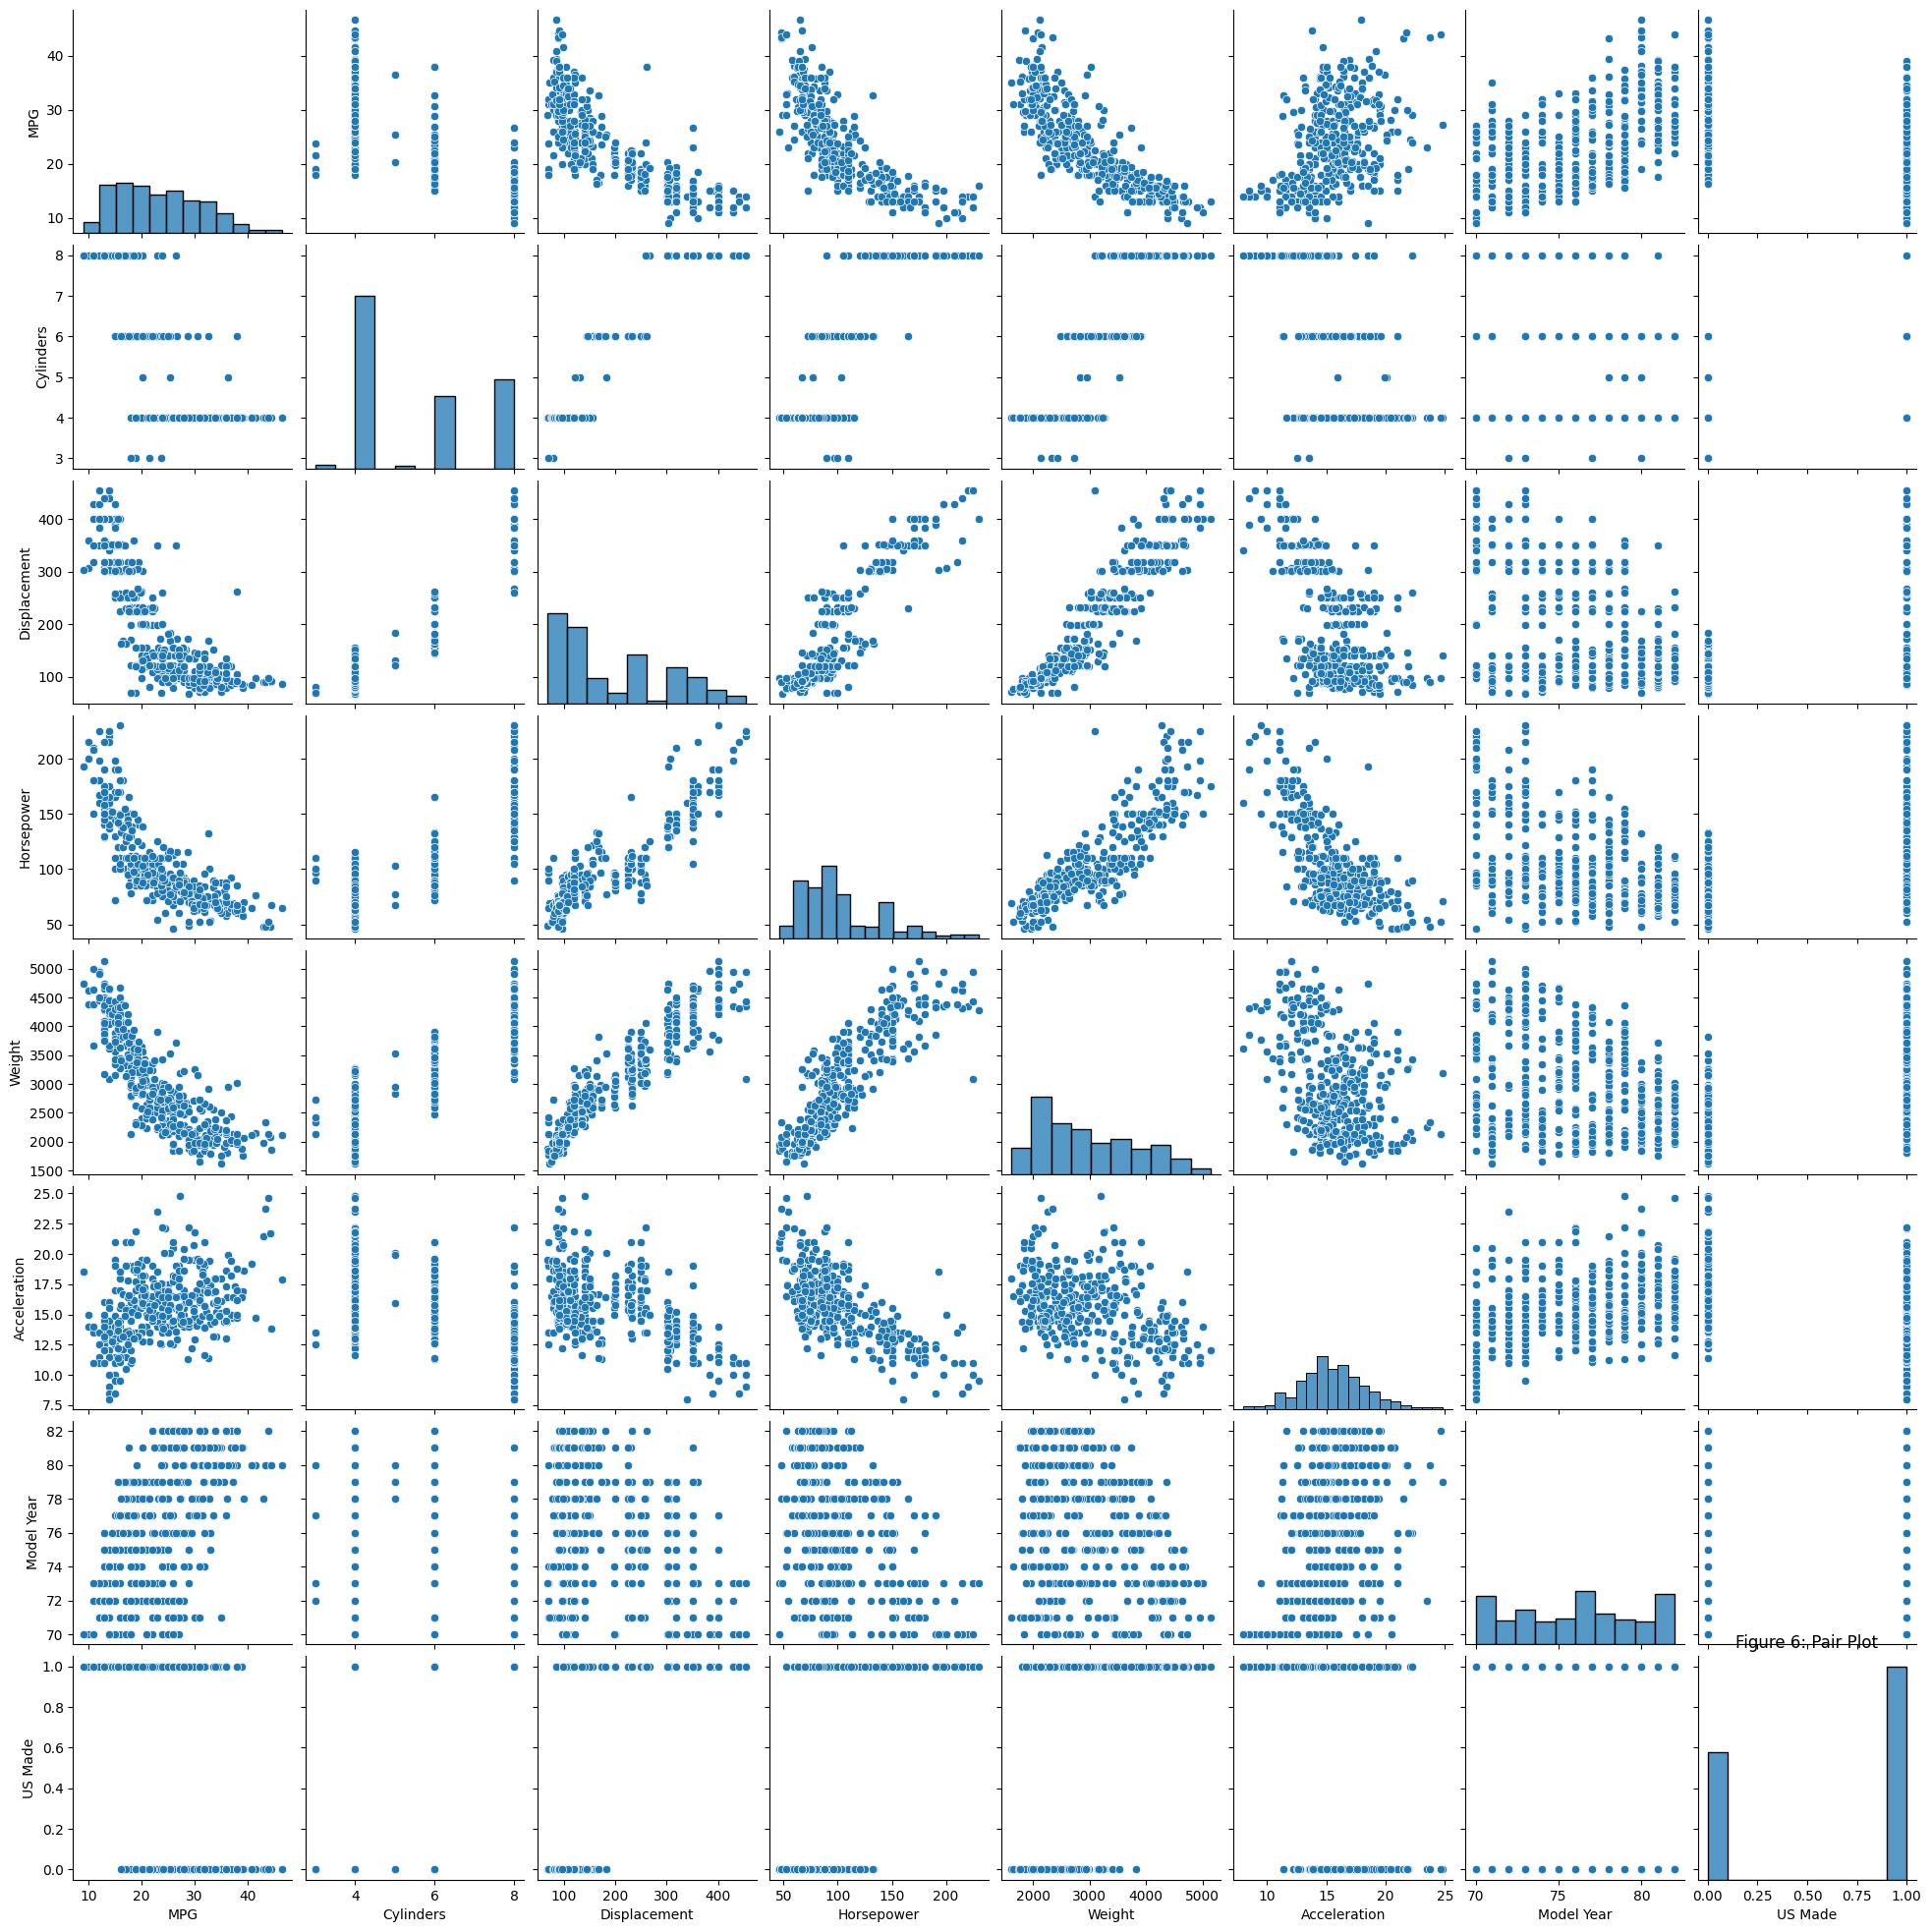

In [47]:
# Pair Plot
sns.pairplot(DF, vars=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'US Made'])
plt.title('Figure 6: Pair Plot')
plt.show()

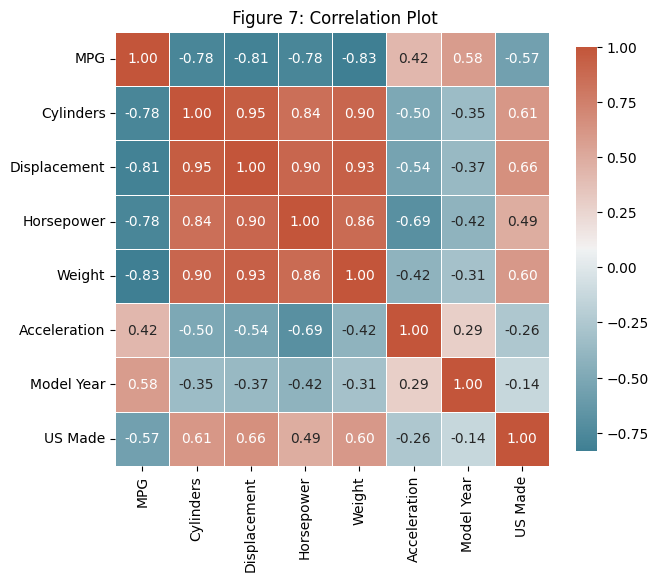

In [48]:
# Correaltion Matrix
# Heat Map

corr_matrix = DF.corr()

# Matplotlib figure size
plt.figure(figsize=(7, 7))

# Heat map
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".2f", linewidths=.5, square=True, cbar_kws={"shrink": 0.75})

plt.title(' Figure 7: Correlation Plot')
plt.show()

In [49]:
# PART B: LINEAR REGRESSION 

# Independent Variables for the regression analysis
independent_vars = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'US Made']

# Selecting independent variables (features) and the dependent variable (target)
X = DF[independent_vars]
y = DF['MPG']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)

# Fit the model using statsmodels
model = sm.OLS(y_train, X_train).fit()

# Detailed summary statistics
print(model.summary())

# Adding a constant term for the intercept in the testing data
X_test = sm.add_constant(X_test)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model performance
mse_1 = mean_squared_error(y_test, y_pred)
rmse_1 = np.sqrt(mse_1)
r2_1 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse_1:.2f}')
print(f'Root Mean Squared Error: {rmse_1:.2f}')
print(f'R-squared: {r2_1:.2f}')


                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     210.6
Date:                Sun, 12 Nov 2023   Prob (F-statistic):          8.98e-113
Time:                        15:11:28   Log-Likelihood:                -816.80
No. Observations:                 313   AIC:                             1650.
Df Residuals:                     305   BIC:                             1680.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -16.6855      5.319     -3.137   

In [50]:
### PART 3 : MODEL OPTIMIZATION USING SELECTION TECHNIQUES

# 1. Feature selection using FORWARD SELECTION METHOD #

# Forward selection
def forward_selection(X, y, initial_features=[]):
    features = set(initial_features)
    selected_features = []
    
    while len(features) < X.shape[1]:
        remaining_features = list(set(X.columns) - set(selected_features))
        best_pvalue = 1.0
        best_feature = None
        
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [feature]])).fit()
            pvalue = model.pvalues[feature]
            
            if pvalue < best_pvalue:
                best_pvalue = pvalue
                best_feature = feature
        
        if best_feature is not None:
            selected_features.append(best_feature)
            features = set(selected_features)
        else:
            break
    
    return selected_features

# Perform forward selection
selected_features_forward = forward_selection(X_train, y_train)

# Print selected features
print("Selected features using forward selection:", selected_features_forward)

Selected features using forward selection: ['const', 'Weight', 'Model Year', 'US Made', 'Displacement', 'Horsepower', 'Cylinders', 'Acceleration']


In [51]:
# Linear Regression after Forward selection:
X_train_forward = sm.add_constant(X_train[selected_features_forward])
model_forward = sm.OLS(y_train, X_train_forward).fit()


In [52]:
# Model Summary after FORWARD SELECTION
# Detailed summary statistics for the model with forward selection
print(model_forward.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     210.6
Date:                Sun, 12 Nov 2023   Prob (F-statistic):          8.98e-113
Time:                        15:11:28   Log-Likelihood:                -816.80
No. Observations:                 313   AIC:                             1650.
Df Residuals:                     305   BIC:                             1680.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -16.6855      5.319     -3.137   

In [53]:
# Get R-squared value
r2_forward = model_forward.rsquared

print(f'R-squared Value using Forward Selection is: {r2_forward:.2f}')

R-squared Value using Forward Selection is: 0.83


In [54]:
# Get AIC value from the model summary: FORWARD SELECTION
aic_value_forward = model_forward.aic

print(f'AIC Value using Forward Selection is: {aic_value_forward:.2f}')

AIC Value using Forward Selection is: 1649.59


In [55]:
# BACKWARD SELECTION #

In [56]:
# 2. Feature selection using BACKWARD SELECTION 

def backward_elimination(X, y, significance_level=0.05):
    features = X.columns.tolist()
    
    while len(features) > 0:
        model = sm.OLS(y, sm.add_constant(X[features])).fit()
        max_pvalue = max(model.pvalues)
        
        if max_pvalue > significance_level:
            removed_feature = model.pvalues.idxmax()
            features.remove(removed_feature)
        else:
            break
    
    return features

# Perform backward elimination
selected_features_backward = backward_elimination(X_train, y_train)

# Print selected features
print("Selected features using backward elimination:", selected_features_backward)

Selected features using backward elimination: ['const', 'Displacement', 'Horsepower', 'Weight', 'Model Year', 'US Made']


In [57]:
# Fitting the model using the selected features FOR BACKWARD SELECTION
X_train_backward = sm.add_constant(X_train[selected_features_backward])
model_backward = sm.OLS(y_train, X_train_backward).fit()

In [58]:
# Detailed summary statistics for the model with backward elimination
print(model_backward.summary())


                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     295.6
Date:                Sun, 12 Nov 2023   Prob (F-statistic):          4.95e-115
Time:                        15:11:28   Log-Likelihood:                -817.30
No. Observations:                 313   AIC:                             1647.
Df Residuals:                     307   BIC:                             1669.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -16.5295      4.723     -3.500   

In [59]:
# Get AIC value from the model summary : backward
aic_value_backward = model_backward.aic

print(f'AIC Value using Backward Selection is: {aic_value_backward:.2f}')


AIC Value using Backward Selection is: 1646.60


In [60]:
# Get R-squared value
r2_backward = model_backward.rsquared

print(f'R-squared Value using Backrward Selection is: {r2_backward:.2f}')

R-squared Value using Backrward Selection is: 0.83


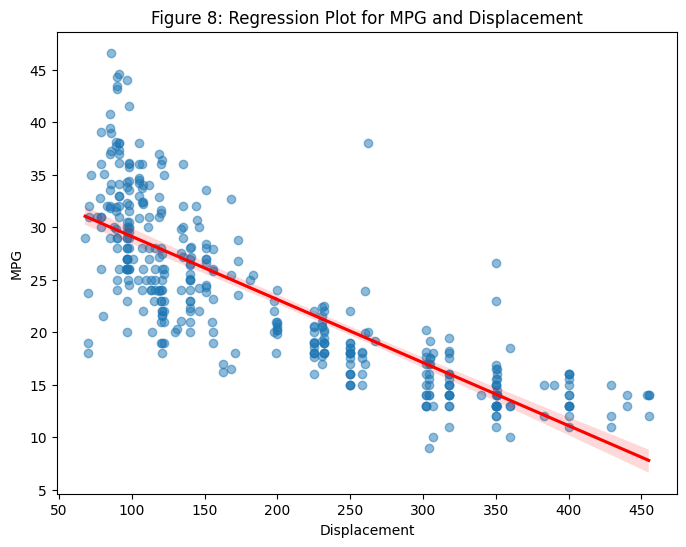

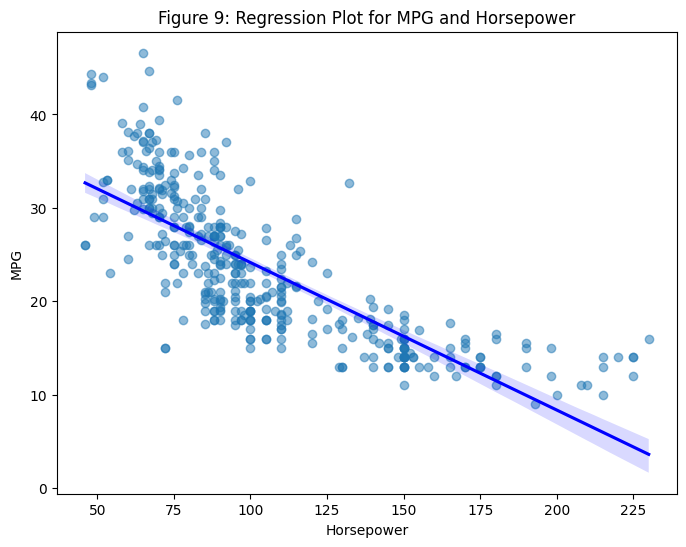

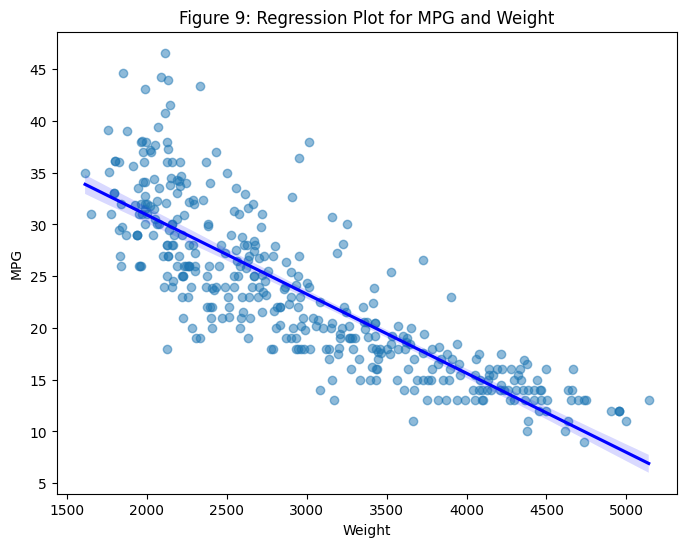

In [61]:
# Regression plot for Displacement
plt.figure(figsize=(8, 6))
sns.regplot(x='Displacement', y='MPG', data=DF, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Figure 8: Regression Plot for MPG and Displacement')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.show()

# Regression plot for Horsepower
plt.figure(figsize=(8, 6))
sns.regplot(x='Horsepower', y='MPG', data=DF, scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
plt.title('Figure 9: Regression Plot for MPG and Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

# Regression plot for Weight
plt.figure(figsize=(8, 6))
sns.regplot(x='Weight', y='MPG', data=DF, scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
plt.title('Figure 9: Regression Plot for MPG and Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()